In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline

# Load data
file_path = r"C:\Users\youg_\capstone-project-YougOsti\Data\Raw\SocioEconomic_data\production-of-agricultural-commodities_CBS_NPL.csv"
df = pd.read_csv(file_path)

# Preview data
print(df.head(3))

  Agricultural Commodities  1998/99  1999/00  2000/01  2001/02  2002/03  \
0              Food grains   6465.0   6985.0   7172.0   7248.0   7361.0   
1                    Paddy   3710.0   4030.0   4216.0   4165.0   4133.0   
2                    Maize   1346.0   1445.0   1484.0   1511.0   1569.0   

   2003/04  2004/05  2005/06  2006/07  2007/08  2008/09  2009/10  2010/11  \
0   7745.0   7767.0   7656.0   7329.0   8069.0   8115.0   7763.0   8615.0   
1   4456.0   4290.0   4209.0   3681.0   4299.0   4524.0   4023.0   4460.0   
2   1590.0   1716.0   1734.0   1820.0   1879.0   1931.0   1855.0   2067.0   

   2011/12  2012/13  
0  12293.0  11330.0  
1   5072.0   4505.0  
2   2179.0   1999.0  


In [2]:
df.isnull().sum()

Agricultural Commodities    0
1998/99                     0
1999/00                     0
2000/01                     0
2001/02                     0
2002/03                     0
2003/04                     0
2004/05                     0
2005/06                     0
2006/07                     0
2007/08                     0
2008/09                     0
2009/10                     0
2010/11                     1
2011/12                     0
2012/13                     0
dtype: int64

In [4]:
# Fill missing values using forward fill across columns (years)
df = df.ffill(axis=1)

# As a backup, fill any remaining NaNs using backward fill
df = df.bfill(axis=1)

# Verify
print(df.isnull().sum())



Agricultural Commodities    0
1998/99                     0
1999/00                     0
2000/01                     0
2001/02                     0
2002/03                     0
2003/04                     0
2004/05                     0
2005/06                     0
2006/07                     0
2007/08                     0
2008/09                     0
2009/10                     0
2010/11                     0
2011/12                     0
2012/13                     0
dtype: int64


C:\Users\youg_\AppData\Local\Temp\ipykernel_14696\3378042942.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.bfill(axis=1)


In [5]:
# Define path to save cleaned data
save_path = r"C:\Users\youg_\capstone-project-YougOsti\processed\cleaned_agricultural_data.csv"

# Save the DataFrame
df.to_csv(save_path, index=False)


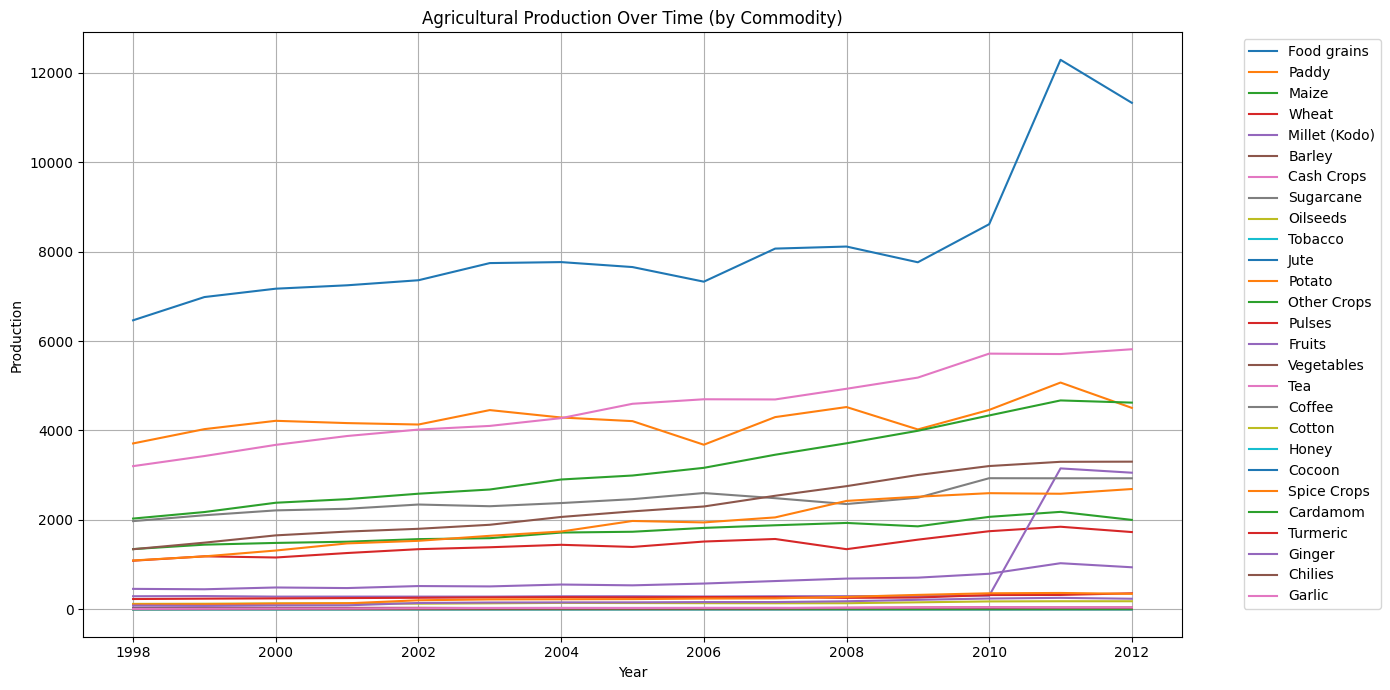

In [6]:
# Melt the dataframe to long format
df_melted = df.melt(id_vars=['Agricultural Commodities'], 
                    var_name='Year', 
                    value_name='Production')

# Convert year to datetime object (use only the starting year)
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d{4})').astype(int)

# Plot the data
plt.figure(figsize=(14, 7))

# Plot each commodity
for commodity in df_melted['Agricultural Commodities'].unique():
    data = df_melted[df_melted['Agricultural Commodities'] == commodity]
    plt.plot(data['Year'], data['Production'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Agricultural Production Over Time (by Commodity)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
